<div style="text-align: center; padding: 40px; background-color: #f4f4f4; border-radius: 10px;">
    <span style="font-size: 30px; font-weight: bold; text-decoration: underline; color: #333;">
        French Real Estate: Data Study
    </span>
</div>

<div style="text-align: center; font-size: 22px; line-height: 1.8; color: #555; margin-top: 20px;">
    SUTHAKARAN Inthushan<br>
    2024/2025
    
</div>

<hr style="border: 1px solid #ddd; width: 80%; margin-top: 40px;">


# Project overview
In this project, we will be analysing property data from the `data.gouv.fr` platform in order to derive useful information for a property investor. To do this, we are going to use the data science skills we acquired during our training.

In this project, we will focus on the five most attractive departments in France, analyzing property value data from 2019 to 2024.

---

The project will be structured as follows:

1.  **Project Initialization**
2. **Data Mining**
3. **Visualisation**
4. **Conclusion and Recommendations**

---

## 1. Project Initialization: Data Cleaning and Preparation


<p style="text-align: left; color: #555; font-size: 16px;">
    In this section, we will import the necessary Python libraries essential for the project. We will then proceed with loading, cleaning, and preparing the data to ensure it is ready for comprehensive analysis and utilization.


</p>


### 1.1. Installing and Importing Essential Libraries



In [ ]:
# Installing the libraries needed for data analysis

!pip install ipywidgets widgetsnbextension --upgrade

In [26]:
# Importing necessary libraries for the project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider, Dropdown
import seaborn as sns

### 1.2. Data Cleaning
<p style="text-align: left; color: #555; font-size: 16px;">
In this section, we will present the data cleaning process performed on the entire file.
</p>


In [27]:
# Loading the file '31_2019.csv' into a DataFrame
df = pd.read_csv("../Data/datavis_data/data_vis_departments/31/31_2019.csv", low_memory = False)

<p style="text-align: left; color: #555; font-size: 16px;">
To begin cleaning up the file, we will first look at the number of missing values.
</p>


In [28]:
# Displays the dimensions of the DataFrame
print("Shape:", df.shape)

print("Count of Missing Values:")
# Displays the number of missing values ​​per column
print(df.isna().sum())


Shape: (42763, 40)
Count of Missing Values:
id_mutation                         0
date_mutation                       0
numero_disposition                  0
nature_mutation                     0
valeur_fonciere                    69
adresse_numero                  12869
adresse_suffixe                 40389
adresse_nom_voie                  600
adresse_code_voie                 600
code_postal                       601
code_commune                        0
nom_commune                         0
code_departement                    0
ancien_code_commune             42763
ancien_nom_commune              42763
id_parcelle                         0
ancien_id_parcelle              42763
numero_volume                   42693
lot1_numero                     20981
lot1_surface_carrez             38655
lot2_numero                     39605
lot2_surface_carrez             41982
lot3_numero                     42165
lot3_surface_carrez             42672
lot4_numero                     42643
lot4_s

 <p style="text-align: left; color: #555; font-size: 16px;">
We remove rows from columns for which it is not possible to replace missing values ​​with a median, mode, or any other value, in order to maintain optimal precision.
</p>


In [29]:
df = df.dropna(subset=["adresse_numero", "type_local", "code_type_local", "longitude", "latitude", "valeur_fonciere", "adresse_nom_voie", "code_postal"])

 <p style="text-align: left; color: #555; font-size: 16px;">
We remove columns with too many missing values, as well as those we do not wish to keep for the study, in order to lighten the dataset.
</p>


In [30]:
df = df.drop(columns = ["ancien_code_commune","ancien_nom_commune", "ancien_id_parcelle", "numero_volume", "code_nature_culture", "nature_culture", "code_nature_culture_speciale", "nature_culture_speciale"])
df = df.drop(columns = df.loc[:, "lot1_numero":"lot5_surface_carrez"].columns)

<p style="text-align: left; color: #555; font-size: 16px;">
After performing the above operations, there are only 4 columns with missing values: <strong>address_suffixe</strong>, <strong>surface_reelle_bati</strong>, <strong>nombre_rooms_principales</strong>, and <strong>surface_terrain</strong>. We can now proceed to replace these values. Since not all properties systematically have an address suffix, we can replace the missing values ​​with "None".
</p>


In [31]:
df["adresse_suffixe"] = df["adresse_suffixe"].fillna("None")

<p style="text-align: left; color: #555; font-size: 16px;">
A symmetric distribution indicates that the data is evenly spread around the mean, making the mean a suitable choice for replacing missing values. In contrast, in an asymmetric distribution, extreme values have a significant impact. Since the median is less sensitive to outliers, it is a more appropriate choice for replacing missing values.
</p>

In [32]:
# Displays the dimensions of the DataFrame
print("Shape:", df.shape)

print("Count of Missing Values:")
# Displays the number of missing values ​​per column
print(df.isna().sum())


Shape: (23264, 22)
Count of Missing Values:
id_mutation                      0
date_mutation                    0
numero_disposition               0
nature_mutation                  0
valeur_fonciere                  0
adresse_numero                   0
adresse_suffixe                  0
adresse_nom_voie                 0
adresse_code_voie                0
code_postal                      0
code_commune                     0
nom_commune                      0
code_departement                 0
id_parcelle                      0
nombre_lots                      0
code_type_local                  0
type_local                       0
surface_reelle_bati           7159
nombre_pieces_principales       24
surface_terrain              14909
longitude                        0
latitude                         0
dtype: int64


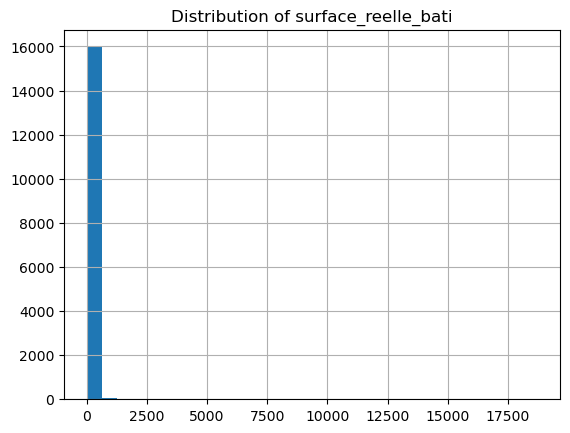

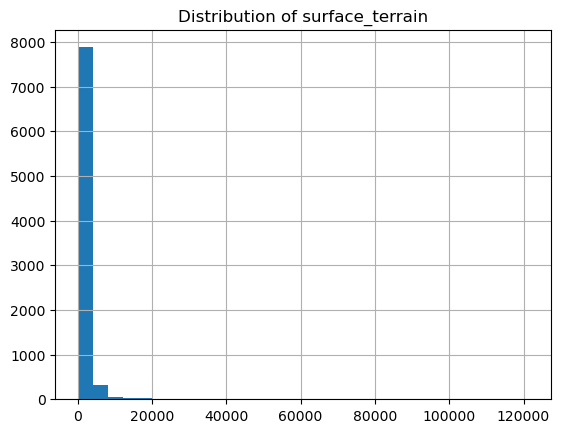

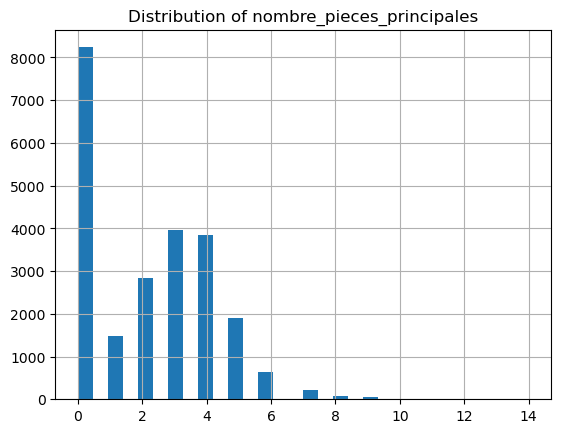

In [33]:
# Plot the histogram to see if the distribution of the variables is symmetrical or not
num_var = ["surface_reelle_bati", "surface_terrain", "nombre_pieces_principales"]
for i in num_var:
    plt.figure()
    df[i].hist(bins=30)
    plt.title("Distribution of " + i)
    plt.show()

In [34]:
# The missing values ​​in the following columns are replaced by the median. We can observe from the histograms previously plotted that their distributions are asymmetrical
df["surface_reelle_bati"] = df["surface_reelle_bati"].fillna(df["surface_reelle_bati"].median())
df["surface_terrain"] = df["surface_terrain"].fillna(df["surface_terrain"].median())
df["nombre_pieces_principales"] = df["nombre_pieces_principales"].fillna(df["nombre_pieces_principales"].median())

<p style="text-align: left; color: #555; font-size: 16px;">
Now we can remove duplicate rows. This is done last, because new duplicates may appear when deleting some columns.
</p>

In [35]:
df = df.drop_duplicates(keep = "first")

<p style="text-align: left; color: #555; font-size: 16px;">
The dataframe has been cleaned: it no longer contains missing values ​​or duplicate rows.
</p>
  

In [36]:
# Displays the dimensions of the DataFrame
print("Shape:", df.shape)

# Displays the number of duplicate lines
print("Number of Duplicated Rows:", df.duplicated(keep = "first").sum())

print("Count of Missing Values:")
# Displays the number of missing values ​​per column
print(df.isna().sum())


Shape: (20638, 22)
Number of Duplicated Rows: 0
Count of Missing Values:
id_mutation                  0
date_mutation                0
numero_disposition           0
nature_mutation              0
valeur_fonciere              0
adresse_numero               0
adresse_suffixe              0
adresse_nom_voie             0
adresse_code_voie            0
code_postal                  0
code_commune                 0
nom_commune                  0
code_departement             0
id_parcelle                  0
nombre_lots                  0
code_type_local              0
type_local                   0
surface_reelle_bati          0
nombre_pieces_principales    0
surface_terrain              0
longitude                    0
latitude                     0
dtype: int64


<p style="text-align: left; color: #555; font-size: 16px;">
    Modification of the type of the <strong>date_mutation</strong> column from the object type to the date type, in order to facilitate temporal manipulations.
</p>
  
>

In [37]:
df["date_mutation"] = pd.to_datetime(df["date_mutation"], format="%Y-%m-%d")

In [38]:
# We can display information about the DataFrame after all the modifications
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 20638 entries, 0 to 42759
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   id_mutation                20638 non-null  object        
 1   date_mutation              20638 non-null  datetime64[ns]
 2   numero_disposition         20638 non-null  int64         
 3   nature_mutation            20638 non-null  object        
 4   valeur_fonciere            20638 non-null  float64       
 5   adresse_numero             20638 non-null  float64       
 6   adresse_suffixe            20638 non-null  object        
 7   adresse_nom_voie           20638 non-null  object        
 8   adresse_code_voie          20638 non-null  object        
 9   code_postal                20638 non-null  float64       
 10  code_commune               20638 non-null  int64         
 11  nom_commune                20638 non-null  object        
 12  code_depa

### 1.3. Process Automation
<p style="text-align: left; color: #555; font-size: 16px;">
In this section, we will consolidate all the previous steps into a single function, which we will apply to all the files before saving them into a new CSV file.
</p>


In [39]:
def clean_transform_dataframe(df):
    # Drop rows with missing important information
    df = df.dropna(subset=["adresse_numero", "type_local", "code_type_local", "longitude", "latitude", "valeur_fonciere", "adresse_nom_voie", "code_postal"])
    
    # Drop unnecessary columns that won't be used in analysis
    df = df.drop(columns = df.loc[:, "lot1_numero":"lot5_surface_carrez"].columns)
    df = df.drop(columns = ["ancien_code_commune","ancien_nom_commune", "ancien_id_parcelle", "numero_volume", "code_nature_culture", "nature_culture", "code_nature_culture_speciale", "nature_culture_speciale"])
    
    # Replace missing address suffix with "None"
    df["adresse_suffixe"] = df["adresse_suffixe"].fillna("Aucune")
    
    
    # Replace missing values in building and land surface with the median value
    df["surface_reelle_bati"] = df["surface_reelle_bati"].fillna(df["surface_reelle_bati"].median())
    df["surface_terrain"] = df["surface_terrain"].fillna(df["surface_terrain"].median())
    
    # Replace missing values with the median 
    df["nombre_pieces_principales"] = df["nombre_pieces_principales"].fillna(df["nombre_pieces_principales"].median())

    # Remove duplicate rows
    df = df.drop_duplicates(keep = "first")
    return df


In [40]:
# Iterate over each department
for i in [31, 33, 44, 69, 75]:
    # Create an empty list to hold the DataFrames for each year
    combined_df = []

    # Iterate over each year
    for j in range(2019, 2025):
        # Read the CSV file for the specific department and year
        df = pd.read_csv("../Data/datavis_data/data_vis_departments/" + str(i) + "/" + str(i) + "_" + str(j) + ".csv", low_memory=False)
        
        # Clean and transform the DataFrame using the previously defined function
        df = clean_transform_dataframe(df)
        
        # Append the cleaned DataFrame to the list
        combined_df.append(df)
        
    # Combine all DataFrames for the department into one DataFrame
    combined_df = pd.concat(combined_df, ignore_index=True)
    
    # Save the combined cleaned DataFrame as a new CSV file
    combined_df.to_csv("../Data/data_cleaned/"+ str(i) + "_cleaned.csv", index=False)
    

## 2. Data Mining

<p style="text-align: left; color: #555; font-size: 16px;">
    In this section, we will work with the cleaned data to extract relevant insights for our analysis.
</p>


In [41]:
# Loading CSV files into separate DataFrames
df31 = pd.read_csv("../Data/data_cleaned/31_cleaned.csv", low_memory = False)
df33 = pd.read_csv("../Data/data_cleaned/33_cleaned.csv", low_memory = False)
df44 = pd.read_csv("../Data/data_cleaned/44_cleaned.csv", low_memory = False)
df69 = pd.read_csv("../Data/data_cleaned/69_cleaned.csv", low_memory = False)
df75 = pd.read_csv("../Data/data_cleaned/75_cleaned.csv", low_memory = False)

# Converting column "date_mutation" to datetime type. It seems that when reloading the dataframe, the type of this column is changed.
df31["date_mutation"] = pd.to_datetime(df31["date_mutation"], format="%Y-%m-%d")
df33["date_mutation"] = pd.to_datetime(df33["date_mutation"], format="%Y-%m-%d")
df44["date_mutation"] = pd.to_datetime(df44["date_mutation"], format="%Y-%m-%d")
df69["date_mutation"] = pd.to_datetime(df69["date_mutation"], format="%Y-%m-%d")
df75["date_mutation"] = pd.to_datetime(df75["date_mutation"], format="%Y-%m-%d")


<p style="text-align: left; color: #555; font-size: 16px;">
    Statistics on our main variable <strong>valeur_fonciere</strong>.
</p>
  


In [42]:
print("31:")
print(df31[["valeur_fonciere"]].describe())
print("\n33:")
print(df33[["valeur_fonciere"]].describe())
print("\n44:")
print(df44[["valeur_fonciere"]].describe())
print("\n69:")
print(df69[["valeur_fonciere"]].describe())
print("\n75:")
print(df75[["valeur_fonciere"]].describe())

31:
       valeur_fonciere
count     2.154240e+05
mean      3.248121e+05
std       1.114637e+06
min       2.500000e-01
25%       1.240000e+05
50%       1.900000e+05
75%       3.000000e+05
max       8.040000e+07

33:
       valeur_fonciere
count     2.347470e+05
mean      4.309878e+05
std       2.008234e+06
min       1.800000e-01
25%       1.610000e+05
50%       2.500000e+05
75%       4.000000e+05
max       1.493280e+08

44:
       valeur_fonciere
count     2.121160e+05
mean      3.286008e+05
std       1.106960e+06
min       1.500000e-01
25%       1.472926e+05
50%       2.200000e+05
75%       3.330000e+05
max       6.276000e+07

69:
       valeur_fonciere
count     2.855430e+05
mean      4.902456e+05
std       2.157501e+06
min       1.500000e-01
25%       1.650000e+05
50%       2.550000e+05
75%       4.000000e+05
max       1.730360e+08

75:
       valeur_fonciere
count     3.304390e+05
mean      2.086743e+06
std       1.661716e+07
min       1.500000e-01
25%       2.490000e+05
50%       

<p style="text-align: left; color: #555; font-size: 16px;">
In this cell, we will make some changes to our DataFrame:
<ul>
<li>Created a new <strong>month</strong> column by extracting the month from the <strong>date_mutation</strong> column.</li>
<li>Created a new <strong>year</strong> column by extracting the yeaer from the <strong>date_mutation</strong> column.</li>

</ul>
</p>

In [43]:
def get_month(dt):
    # Return the month
    return dt.month

def get_year(dt):
    # Return the year
    return dt.year
    
# Apply the get_date function to extract the month from the "date_mutation" column    
df31["month"] = df31["date_mutation"].map(get_month)
df33["month"] = df33["date_mutation"].map(get_month)
df44["month"] = df44["date_mutation"].map(get_month)
df69["month"] = df69["date_mutation"].map(get_month)
df75["month"] = df75["date_mutation"].map(get_month)


# Apply the get_year function to extract the year from the "date_mutation" column
df31["year"] = df31["date_mutation"].map(get_year)
df33["year"] = df33["date_mutation"].map(get_year)
df44["year"] = df44["date_mutation"].map(get_year)
df69["year"] = df69["date_mutation"].map(get_year)
df75["year"] = df75["date_mutation"].map(get_year)


<p style="text-align: left; color: #555; font-size: 16px;">
    Statistics on the main variable <strong>valeur_fonciere</strong> by year and by department.
</p>

In [44]:
print("31:")
print(df31.groupby("year")[["valeur_fonciere"]].describe())
print("\n33:")
print(df33.groupby("year")[["valeur_fonciere"]].describe())
print("\n44:")
print(df44.groupby("year")[["valeur_fonciere"]].describe())
print("\n69:")
print(df69.groupby("year")[["valeur_fonciere"]].describe())
print("\n75:")
print(df75.groupby("year")[["valeur_fonciere"]].describe())


31:
     valeur_fonciere                                                          \
               count           mean           std   min        25%       50%   
year                                                                           
2019         20638.0  308274.554781  1.303748e+06  1.00  116368.75  177100.0   
2020         40660.0  338202.438702  1.294673e+06  1.00  120000.00  183000.0   
2021         50427.0  341338.073214  1.115173e+06  0.25  126900.00  195762.0   
2022         49755.0  320610.098769  1.010169e+06  1.00  130000.00  200000.0   
2023         38726.0  316052.973060  1.048314e+06  1.00  123832.50  193000.0   
2024         15218.0  292729.317167  7.398966e+05  1.00  116200.00  179027.0   

                             
            75%         max  
year                         
2019  271396.42  46180800.0  
2020  282000.00  80400000.0  
2021  306000.00  39933792.0  
2022  320000.00  49500000.0  
2023  311500.00  44048640.0  
2024  291950.00  19513148.0  

33:


<p style="text-align: left; color: #555; font-size: 16px;">
Creation of the variable <strong>valeur_fonciere_par_m2</strong> to compare real estate prices by taking into account only the surface area of ​​the properties.
</p>

In [45]:
df31["valeur_fonciere_par_m2"] = df31["valeur_fonciere"] / df31["surface_reelle_bati"]
df33["valeur_fonciere_par_m2"] = df33["valeur_fonciere"] / df33["surface_reelle_bati"]
df44["valeur_fonciere_par_m2"] = df44["valeur_fonciere"] / df44["surface_reelle_bati"]
df69["valeur_fonciere_par_m2"] = df69["valeur_fonciere"] / df69["surface_reelle_bati"]
df75["valeur_fonciere_par_m2"] = df75["valeur_fonciere"] / df75["surface_reelle_bati"]

<p style="text-align: left; color: #555; font-size: 16px;">
Statistical analysis of the <strong>valeur_fonciere_par_m2</strong> by year and by department to observe variations in prices per square meter over time and across different regions.
</p>


In [46]:
print("31:")
print(df31.groupby("year")[["valeur_fonciere_par_m2"]].describe())
print("\n33:")
print(df33.groupby("year")[["valeur_fonciere_par_m2"]].describe())
print("\n44:")
print(df44.groupby("year")[["valeur_fonciere_par_m2"]].describe())
print("\n69:")
print(df69.groupby("year")[["valeur_fonciere_par_m2"]].describe())
print("\n75:")
print(df75.groupby("year")[["valeur_fonciere_par_m2"]].describe())

31:
     valeur_fonciere_par_m2                                                    \
                      count         mean           std       min          25%   
year                                                                            
2019                20638.0  4033.105869  16487.571191  0.000100  1809.980573   
2020                40660.0  4764.448776  19328.337801  0.000169  1845.070423   
2021                50427.0  4915.116470  22817.399339  0.000256  1909.090909   
2022                49755.0  4238.530658  12663.151691  0.000133  2013.888889   
2023                38726.0  4652.178939  28599.241506  0.000089  1922.535211   
2024                15218.0  4725.519576  24993.089486  0.000586  1822.828341   

                                              
              50%          75%           max  
year                                          
2019  2528.129451  3427.240260  1.150000e+06  
2020  2600.000000  3591.549296  1.132394e+06  
2021  2740.659341  3800.791035 

## 3. Data Visualization
<p style="text-align: left; color: #555; font-size: 16px;">
In this section, we will create data visualizations to highlight the relationships that may exist between different variables. The analysis will be structured progressively, allowing us to refine our observations and deepen our understanding of the interactions as the study advances.
</p>



### 3.1. Analysis of real estate transactions over time
<p style="text-align: left; color: #555; font-size: 16px;">
In this section, we will analyze the number of transactions that took place during the months and years between 2019 and 2024. We will also examine the evolution of transaction numbers by the type of mutation.
</p>




<p style="text-align: left; color: #555; font-size: 16px;">
We display the number of transactions per department and per year using a bar chart.
</p>



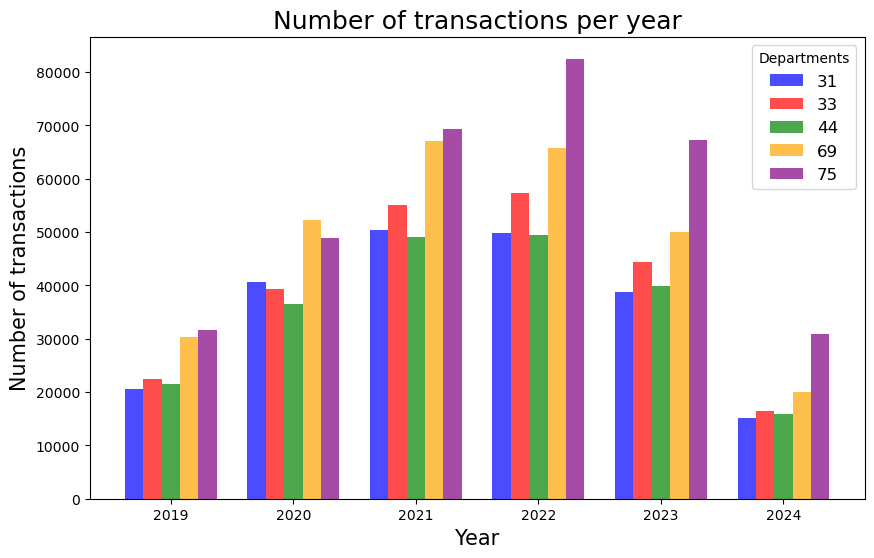

In [47]:
# Calculation of the number of transactions per year for each department
num_transaction_year_31 = df31.groupby("year").size()  
num_transaction_year_33 = df33.groupby("year").size() 
num_transaction_year_44 = df44.groupby("year").size()  
num_transaction_year_69 = df69.groupby("year").size()  
num_transaction_year_75 = df75.groupby("year").size()  

plt.figure(figsize = (10, 6))
years = df31["year"].unique()  

# Plot bars for each department with slight offsets for better visualization
plt.bar(years - 0.3, num_transaction_year_31, width = 0.15, label = "31", alpha = 0.7, color = "blue")  
plt.bar(years - 0.15, num_transaction_year_33, width = 0.15, label = "33", alpha = 0.7, color = "red")  
plt.bar(years, num_transaction_year_44, width = 0.15, label = "44", alpha = 0.7, color = "green")  
plt.bar(years + 0.15, num_transaction_year_69, width = 0.15, label = "69", alpha = 0.7, color = "orange")  
plt.bar(years + 0.3, num_transaction_year_75, width = 0.15, label = "75", alpha = 0.7, color = "purple")

# Set the title and axis labels for the plot
plt.title("Number of transactions per year", fontsize = 18)
plt.xlabel("Year", fontsize = 15)
plt.ylabel("Number of transactions", fontsize = 15)  

# Display legend to differentiate departments
plt.legend(title="Departments", fontsize = 12)

plt.show()

<p style="text-align: left; color: #555; font-size: 16px;">
We compare the number of monthly transactions, by department, between the years 2019 and 2024.
</p>

In [48]:
# List of months for the x-axis
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
month_num = list(range(1, 13))

# Function to plot the transactions by year
def plot_transactions(year):
    # Count transactions for each department by month
    num_transactions_31 = df31[df31["year"] == year]["month"].value_counts().reindex(month_num)
    num_transactions_33 = df33[df33["year"] == year]["month"].value_counts().reindex(month_num)
    num_transactions_44 = df44[df44["year"] == year]["month"].value_counts().reindex(month_num)
    num_transactions_69 = df69[df69["year"] == year]["month"].value_counts().reindex(month_num)
    num_transactions_75 = df75[df75["year"] == year]["month"].value_counts().reindex(month_num)

    # Bar width
    bar_width = 0.15

    plt.figure(figsize = (10, 6))

    # Plot bars for each department
    plt.bar([p - 0.3 for p in month_num], num_transactions_31.values, width = bar_width, color = "blue", alpha = 0.7, label = "31")
    plt.bar([p - 0.15 for p in month_num], num_transactions_33.values, width = bar_width, color = "red", alpha = 0.7, label = "33")
    plt.bar(month_num, num_transactions_44.values, width = bar_width, color = "green", alpha = 0.7, label = "44")
    plt.bar([p + 0.15 for p in month_num], num_transactions_69.values, width = bar_width, color = "orange", alpha = 0.7, label = "69")
    plt.bar([p + 0.3 for p in month_num], num_transactions_75.values, width = bar_width, color = "purple", alpha = 0.7, label = "75")

    # Set the x-axis labels, title, and axis labels for the plot
    plt.xticks(month_num, months, rotation = 45)
    plt.title(f"Number of transactions per month ({year})", fontsize = 18)
    plt.xlabel("Month", fontsize = 15)
    plt.ylabel("Number of transactions", fontsize = 15)
    
    # Add a legend
    plt.legend(title = "Departments", fontsize = 12)
    
    plt.show()

# Interactive widget to choose the year
year_slider = IntSlider(min = 2019, max = 2024, step = 1, value = 2024, description = "Year")
interact(plot_transactions, year = year_slider)

interactive(children=(IntSlider(value=2024, description='Year', max=2024, min=2019), Output()), _dom_classes=(…

<function __main__.plot_transactions(year)>

<p style="text-align: left; color: #555; font-size: 16px;">
The graph shows the number of transactions by <strong>nature_mutation</strong> for the years 2019 to 2024.
</p>


In [49]:
# Function to plot the transactions by nature_mutation
def plot_transactions_by_nature(year):
    # Count transactions for each nature_mutation for each department in the given year
    num_transactions_31 = df31[df31["year"] == year]["nature_mutation"].value_counts()  
    num_transactions_33 = df33[df33["year"] == year]["nature_mutation"].value_counts()  
    num_transactions_44 = df44[df44["year"] == year]["nature_mutation"].value_counts()  
    num_transactions_69 = df69[df69["year"] == year]["nature_mutation"].value_counts()  
    num_transactions_75 = df75[df75["year"] == year]["nature_mutation"].value_counts()  

    plt.figure(figsize=(10, 6))

    # Create a DataFrame to store the number of transactions for each department
    num_transactions_df = pd.DataFrame({"31": num_transactions_31, "33": num_transactions_33, "44": num_transactions_44, "69": num_transactions_69, "75": num_transactions_75})

    # Plot a bar chart with the transaction counts for each department
    num_transactions_df.plot(kind='bar', width=0.8, color = ["blue", "red", "green", "orange", "purple"], edgecolor = "black", alpha=0.7)

    # title and labels
    plt.title(f"Number of transactions by \"nature_mutation\" ({year})", fontsize=18)
    plt.xlabel("Nature Mutation", fontsize=15)
    plt.ylabel("Number of transactions", fontsize=15)
    plt.xticks(rotation=45)
    
    # Display the legend 
    plt.legend(title="Departments", fontsize=12)
    
    plt.show()

# Interactive widget to choose the year
year_slider = IntSlider(min=2019, max=2024, step=1, value=2024, description="Year")  # Slider for year selection
interact(plot_transactions_by_nature, year=year_slider)  # Create interactive plot

interactive(children=(IntSlider(value=2024, description='Year', max=2024, min=2019), Output()), _dom_classes=(…

<function __main__.plot_transactions_by_nature(year)>

### 3.2. Analysis of local attractiveness (by municipality)
<p style="text-align: left; color: #555; font-size: 16px;">
In this section, we will examine the evolution of the number of transactions per municipality over the years, as well as the evolution of the price per m2 of the latter.
</p>


In [50]:
# We store our dataframes in a dictionary with the department number as the key. 
# This will allow us to call the right dataframe based on the department passed as an argument to the function.
dep_data = {31: df31, 33: df33, 44: df44, 69: df69, 75: df75}

# Function to display, based on a year and a department, the 10 municipalities with the greatest number of transactions
def plot_top_municipalities(year, dep):
    
    # Load the DataFrame corresponding to the department
    df = dep_data[dep]
    df_filtered = df[df["year"] == year]

    # Count the number of transactions per municipality
    municipality_transactions = df_filtered["nom_commune"].value_counts()
    sorted_municipalities_10 = municipality_transactions.sort_values(ascending = False).head(10)
    
    # Create a horizontal bar chart
    plt.figure(figsize = (10,3))
    plt.barh(sorted_municipalities_10.index, sorted_municipalities_10.values, color="red", edgecolor = "black", alpha=0.7)
    
    # Reverse the order of the municipalities to have the highest at the top
    plt.gca().invert_yaxis()

    # title and labels
    plt.title(f"Top 10 Municipalities with Highest Transactions ({year}, Department {dep})", fontsize=16)
    plt.xlabel("Number of Transactions", fontsize = 12)
    plt.ylabel("Municipality", fontsize = 12)
    plt.show()

# Interactive widget to choose the year and department
year_slider = IntSlider(min = 2019, max = 2024, step = 1, value = 2024, description = "Year: ")
department_selector = Dropdown(options = [31, 33, 44, 69, 75], value = 31, description = "Department: ")
interact(plot_top_municipalities, year = year_slider, dep = department_selector)


interactive(children=(IntSlider(value=2024, description='Year: ', max=2024, min=2019), Dropdown(description='D…

<function __main__.plot_top_municipalities(year, dep)>

<p style="text-align: left; color: #555; font-size: 16px;">
We have had an overview of the 10 municipalities with the most transactions. It would now be interesting to compare the average land value per square meter in these municipalities with that of the department.
</p>



In [51]:
# We store our dataframes in a dictionary with the department number as the key. 
# This will allow us to call the right dataframe based on the department passed as an argument to the function.
dep_data = {31: df31, 33: df33, 44: df44, 69: df69, 75: df75}

# Function to display, based on a year and a department, the average land value per m2 for the 10 municipalities with the greatest number of transactions
def plot_average_value_per_m2(year, dep):
    
    # Load the DataFrame corresponding to the department
    df = dep_data[dep]
    
    # Filter the data for the selected year
    df_filtered = df[df["year"] == year]
    
    # Count the number of transactions per municipality
    municipality_transactions = df_filtered["nom_commune"].value_counts()
    
    # Select the top 10 municipalities with the highest number of transactions
    top_10_municipalities = municipality_transactions.sort_values(ascending=False).head(10)
    
    # Calculate the average land value per m2 for these top 10 municipalities
    municipalities_values_per_m2 = df_filtered[df_filtered["nom_commune"].apply(lambda x: x in top_10_municipalities.index)]
    average_values_per_m2 = municipalities_values_per_m2.groupby("nom_commune")["valeur_fonciere_par_m2"].mean()
    
    # Calculate the average land value per m2 for the entire department
    department_avg_value_per_m2 = df_filtered["valeur_fonciere_par_m2"].mean()
    
    # Sort municipalities by the average land value per m2
    sorted_values_per_m2 = average_values_per_m2.sort_values(ascending = True)
    
    # horizontal bar chart
    plt.figure(figsize = (10, 3))
    plt.barh(sorted_values_per_m2.index, sorted_values_per_m2, color = "lightgreen", edgecolor = "black", alpha = 0.7)
    
    # Add a bar representing the average value for the entire department
    plt.axvline(department_avg_value_per_m2, color = "red", linestyle = "--", label = "Department Average")
    
    # Add title and labels
    plt.title(f"Top 10 Municipalities with Highest Transactions ({year}, Department {dep}) -  Average Land Value per m2", fontsize = 16)
    plt.xlabel("Average Land Value per m2", fontsize = 12)
    plt.ylabel("Municipality", fontsize = 12)
    
    # Add a legend
    plt.legend()
    
    plt.show()

# Interactive widget to choose the year and department
year_slider = IntSlider(min = 2019, max = 2024, step = 1, value = 2024, description = "Year: ")
department_selector = Dropdown(options = [31, 33, 44, 69, 75], value = 31, description = "Department: ")
interact(plot_average_value_per_m2, year = year_slider, dep = department_selector)

interactive(children=(IntSlider(value=2024, description='Year: ', max=2024, min=2019), Dropdown(description='D…

<function __main__.plot_average_value_per_m2(year, dep)>

### 3.3. Analysis of Prices Based on the Number of Main Rooms

<p style="text-align: left; color: #555; font-size: 16px;">
In this section, we will examine the relationship between property value and the number of main rooms over the period from 2019 to 2024.
</p>




In [52]:
# We store our DataFrames in a dictionary with the department number as the key.
# This allows us to dynamically load the right DataFrame based on the department argument passed to the function.
department_data = {31: df31, 33: df33, 44: df44, 69: df69, 75: df75}

# Function to display the average price by number of rooms, by municipality, for a given year and department
def plot_average_price_per_rooms(year, department):
    
    # Load the DataFrame corresponding to the selected department
    df_filtered = department_data[department]
    
    # Filter data to only include rows matching the selected year
    df_filtered = df_filtered[df_filtered["year"] == year]
    
    # Calculate the number of transactions per municipality
    commune_transactions = df_filtered["nom_commune"].value_counts()
    
    # Select the 10 municipalities with the highest number of transactions
    top_10_communes = commune_transactions.sort_values(ascending=False).head(10)
    
    # Filter the data to only include transactions from the top 10 municipalities
    municipalities_filtered = df_filtered[df_filtered["nom_commune"].apply(lambda x: x in top_10_communes.index)]
    # Calculate the average price per number of rooms for each municipality
    avg_price_per_rooms = municipalities_filtered.groupby(["nom_commune", "nombre_pieces_principales"])["valeur_fonciere"].mean().reset_index()
    
    
    plt.figure(figsize = (10, 4))
    
    # Plot the average price for each of the top 10 municipalities
    for i in top_10_communes.index:
        commune_data = avg_price_per_rooms[avg_price_per_rooms["nom_commune"] == i].sort_values(by = "nombre_pieces_principales")
        plt.plot(commune_data["nombre_pieces_principales"], commune_data["valeur_fonciere"], label = i, marker = 'o')
    
    # Add a title and labels
    plt.title(f"Average Price per Number of Main Rooms ({year}, Department {department}) - Top 10 Municipalities", fontsize = 16)
    plt.xlabel("Number of Main Rooms", fontsize = 12)
    plt.ylabel("Average Price", fontsize = 12)
    
    # Add a legend
    plt.legend()
    
    plt.show()

# Interactive widget to choose the year and department
year_slider = IntSlider(min = 2019, max = 2024, step = 1, value = 2024, description = "Year: ")
department_selector = Dropdown(options = [31, 33, 44, 69, 75], value = 31, description = "Department: ")
interact(plot_average_price_per_rooms, year = year_slider, department = department_selector)


interactive(children=(IntSlider(value=2024, description='Year: ', max=2024, min=2019), Dropdown(description='D…

<function __main__.plot_average_price_per_rooms(year, department)>

### 3.4. Geographic visualization

<p style="text-align: left; color: #555; font-size: 16px;">
In this part, we will visualize the distribution of transactions in the departments.
</p>


In [53]:
# We store our DataFrames in a dictionary with the department number as the key.
# This allows us to dynamically load the right DataFrame based on the department argument passed to the function.
dep_data = {31: df31, 33: df33, 44: df44, 69: df69, 75: df75}

def plot_lon_lat(year, dep):

    df = dep_data[dep]
    df_filtered = df[df["year"] == year].loc[:, ["longitude", "latitude"]]
    df_sampled = df_filtered.sample(frac = 0.1, random_state = 42)
    
    plt.figure(figsize=(10, 6))
    sns.kdeplot(x = df_sampled["longitude"], y = df_sampled["latitude"], fill = True, cmap ="YlOrRd", thresh = 0.1, levels = 20)

    plt.show()

# Interactive widget to choose the year and department
year_slider = IntSlider(min = 2019, max = 2024, step = 1, value = 2024, description = "Year: ")
dept_dropdown = Dropdown(options = [31, 33, 44, 69, 75], value = 31, description = "Department: ")
interact(plot_lon_lat, dep = dept_dropdown, year = year_slider)

interactive(children=(IntSlider(value=2024, description='Year: ', max=2024, min=2019), Dropdown(description='D…

<function __main__.plot_lon_lat(year, dep)>

### 3.5. Investment based on the type of premises

<p style="text-align: left; color: #555; font-size: 16px;">
In this section, we will look at the different types of premises in which it is possible to invest.
</p>

In [54]:
# We store our DataFrames in a dictionary with the department number as the key.
# This allows us to dynamically load the right DataFrame based on the department argument passed to the function.
department_data = {31: df31, 33: df33, 44: df44, 69: df69, 75: df75}

# Function to plot local types for a municipality
def plot_com(com, local_counts, year, dept):
    # Filter data for the selected municipality
    counts_com = local_counts.loc[com]
    
    # Create the plot
    plt.figure(figsize = (10, 4))
    counts_com.plot(kind = "bar", color = "lightgreen", alpha = 0.7)
    
    # Add title and labels
    plt.title(f"Local Types for Municipality {com} - {year} - Department {dept}", fontsize = 18)
    plt.xlabel("Local Type", fontsize = 15)
    plt.ylabel("Number of Locals", fontsize = 15)
    
    plt.xticks(rotation = 45)
    
    plt.show()

# Function to prepare data and create the plot local types
def plot_local_types(dept, year):
    # Load the DataFrame corresponding to the selected department
    df_dep = department_data[dept]
    
    # Filter data to only include rows matching the selected year
    df_dep_year = df_dep[df_dep["year"] == year]
    
    # Count local types by municipality
    counts = df_dep_year.groupby(["nom_commune", "type_local"]).size().reset_index(name = "count")
    local_counts = counts.pivot(index = "nom_commune", columns = "type_local", values = "count")
    
    # Count transactions per municipality
    commune_transactions = df_dep_year["nom_commune"].value_counts()

    # Get the top 10 municipalities by total number of transactions
    top_10 = commune_transactions.sort_values(ascending = False).head(10)
    
    # Create a dropdown menu
    com_dropdown = Dropdown(options = list(top_10.index), description = "Municipality: ")
    
    # Display the dropdown menu for municipality selection
    interact(lambda com: plot_com(com, local_counts, year, dept), com = com_dropdown)

# Interactive widget to choose the year and department
year_slider = IntSlider(min = 2019, max = 2024, step = 1, value = 2024, description = "Year: ")
dept_dropdown = Dropdown(options = [31, 33, 44, 69, 75], value = 31, description = "Department: ")
interact(plot_local_types, dept = dept_dropdown, year = year_slider)

interactive(children=(Dropdown(description='Department: ', options=(31, 33, 44, 69, 75), value=31), IntSlider(…

<function __main__.plot_local_types(dept, year)>

## 4. Recommendation and Conclusion 

### 4.1. Recommendation

#### Analysis of Section **3.1**

The charts in section **3.1** clearly show that the department **75** (Paris) overwhelmingly leads in terms of the number of transactions between 2019 and 2024. Although trailing behind, department **69** (Rhône) stands out as the second most active. Following in order are departments **33** (Gironde), **44** (Loire-Atlantique), and **31** (Haute-Garonne).  
The second chart (monthly transactions) reveals that **August** is generally a low-activity month, especially in departments **69** and **75**. However, **June**, **July**, **September**, and **December** emerge as the months with the highest transaction volumes.  
The third chart shows that **sales transactions** have dominated between 2019 and 2024. Additionally, this chart validates the attractiveness ranking of the departments: **75**, followed by **69**, **33**, **44**, and **31**.  

Based on this analysis, we recommend investing during **August**, when competition is at its lowest. Additionally, investing in **April/May** could prepare for the expected peaks in **June/July**.  

---

#### Analysis of Section **3.2**

The charts in section **3.2** refine our analysis by focusing on the attractiveness of municipalities within each department. For simplicity, we consider the **10 most attractive municipalities** per department for each year.  
By analyzing the first and second charts of this section, we identify municipalities offering a good balance between attractiveness and average price per square meter:  

- **75 (Paris)**: Paris 12th, Paris 17th, Paris 18th, Paris 20th  
- **69 (Rhône)**: Lyon 8th, Lyon 9th, Villeurbanne  
- **44 (Loire-Atlantique)**: Saint-Nazaire  
- **33 (Gironde)**: Mérignac  
- **31 (Haute-Garonne)**: X

In general, the recommended districts in Paris represent safe investments due to their stable attractiveness and relatively steady price per square meter over time. For **Rhône**, while prices in Lyon and Villeurbanne were historically high, they have significantly decreased since 2022.  
In the remaining departments, attractiveness is mainly concentrated in major cities such as Nantes, Bordeaux, and Toulouse. However, the price per square meter in these cities often exceeds Paris' maximum prices, making them less appealing. Notable exceptions include **Saint-Nazaire (44)** and **Mérignac (33)**, which offer strong attractiveness at reasonable prices.  

The third chart of section **3.2** further improves our recommendations by examining the evolution of the average price by the number of main rooms. The results are as follows:  

- **75 (Paris)**: Paris 12th, Paris 18th, Paris 20th  
- **69 (Rhône)**: Lyon 8th, Villeurbanne  
- **44 (Loire-Atlantique)**: Saint-Nazaire  
- **33 (Gironde)**: Mérignac  
- **31 (Haute-Garonne)**: X

For all selected municipalities, prices tend to stabilize for properties with fewer than five main rooms. At this stage, we recommend focusing on **dependencies** or **apartments** for investment.  

---

#### Analysis of Section **3.5**

Finally, by analyzing the third chart in section **3.5**, we refine our recommendations based on the type of property. The results are as follows:  

- **75 (Paris)**:  
  - Paris 12th: Dependency  
  - Paris 18th: Apartment  
  - Paris 20th: Apartment  
- **69 (Rhône)**:  
  - Lyon 8th: Dependency  
  - Villeurbanne: Dependency  
- **44 (Loire-Atlantique)**:  
  - Saint-Nazaire: Dependency  
- **33 (Gironde)**:  
  - Mérignac: Dependency  

The above results represent the optimal investment choices in France, based on our analysis.

### 4.2. Conclusion

Based on our analysis of the real estate data, we recommend investing in the most attractive departments in terms of transactions: **75** (Paris), **69** (Rhône), **33** (Gironde), **44** (Loire-Atlantique), and **31** (Haute-Garonne). The best time to invest would be during the months of **June, July, September**, and **December**, with a particular focus on **August**, when competition is lowest. In terms of location, the most promising areas are **Paris 12th**, **Paris 18th**, **Lyon 8th**, **Villeurbanne**, and **Mérignac**. Regarding the type of property, it is recommended to invest in **dependances** or **apartments**, as prices per square meter remain relatively stable in these segments. These investment choices maximize profitability while minimizing risks.
